# Car Insurance Claims Classification

Going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Model Evaluation
7. Experimentation / Improvements

# 1. Problem Definition

How we can use various python based Machine Learning Model and the given parameters to predict if a claim was made?

# 2. Data

Data from: https://www.kaggle.com/sagnik1511/car-insurance-data

## Context

The company has shared its annual car insurance data. Now, you have to find out the real customer behaviors over the data.

## Content

The columns are resembling practical world features.
The outcome column indicates 1 if a customer has claimed his/her loan else 0.
The data has 19 features from there 18 of them are corresponding logs which were taken by the company.

## Acknowledgements

Mostly the data is real and some part of it is also generated by Sagnik Roy.

# 3. Evaluation

As this is a classification problem, we will use the classification metics for evauluting the model

# 4. Features

## Input/Features

    1. ID
    2. AGE
    3. GENDER
    4. RACE
    5. DRIVING_EXPERIENCE
    6. EDUCATION
    7. INCOME
    8. CREDIT_SCORE
    9. VEHICLE_OWNERSHIP
    10. VEHICLE_YEAR
    11. MARRIED
    12. CHILDREN
    13. POSTAL_CODE
    14. ANNUAL_MILEAGE
    15. VEHICLE_TYPE
    16. SPEEDING_VIOLATIONS
    17 .DUIS
    18.PAST_ACCIDENTS
    
## Outputs/Labels
    
    19. OUTCOME

## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/car-insurance-data/Car_Insurance_Claim.csv


## Reading the Dataset

In [3]:
# Local
# df = pd.read_csv('Data/Car_Insurance_Claim.csv')

#Kaggle
df = pd.read_csv('/kaggle/input/car-insurance-data/Car_Insurance_Claim.csv')
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


## Data Exporation

In [4]:
df

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [6]:
df.isnull().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

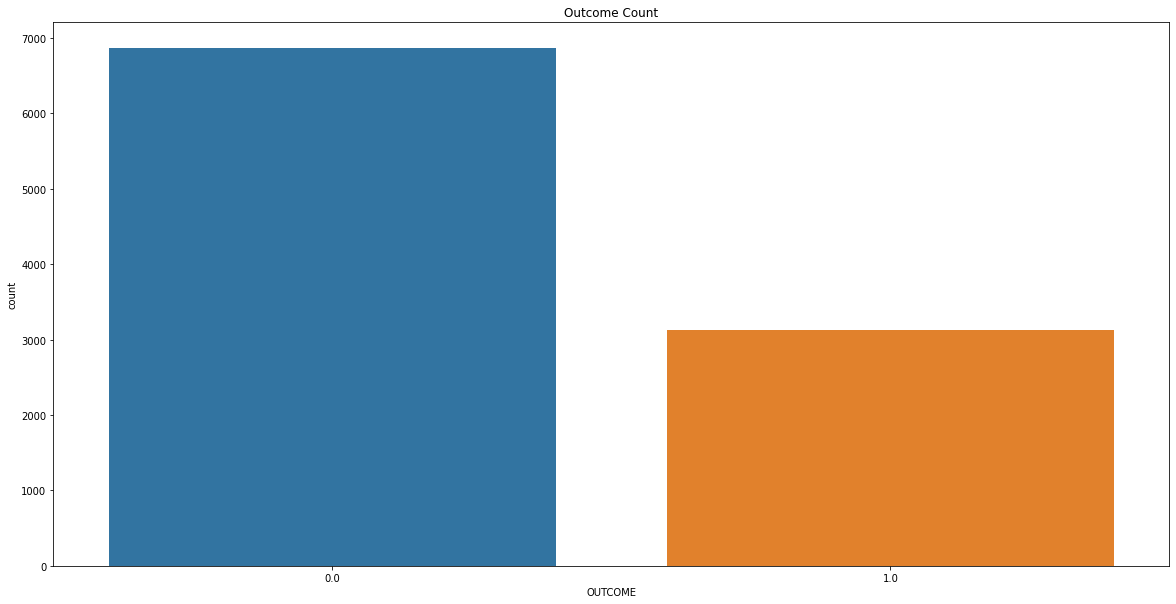

In [7]:
plt.figure(figsize=(20,10))
plt.title('Outcome Count')
sns.countplot(data=df, x ='OUTCOME');

from the count, we can see that the data is in-balanced.

In [8]:
df['AGE'].value_counts()

26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: AGE, dtype: int64

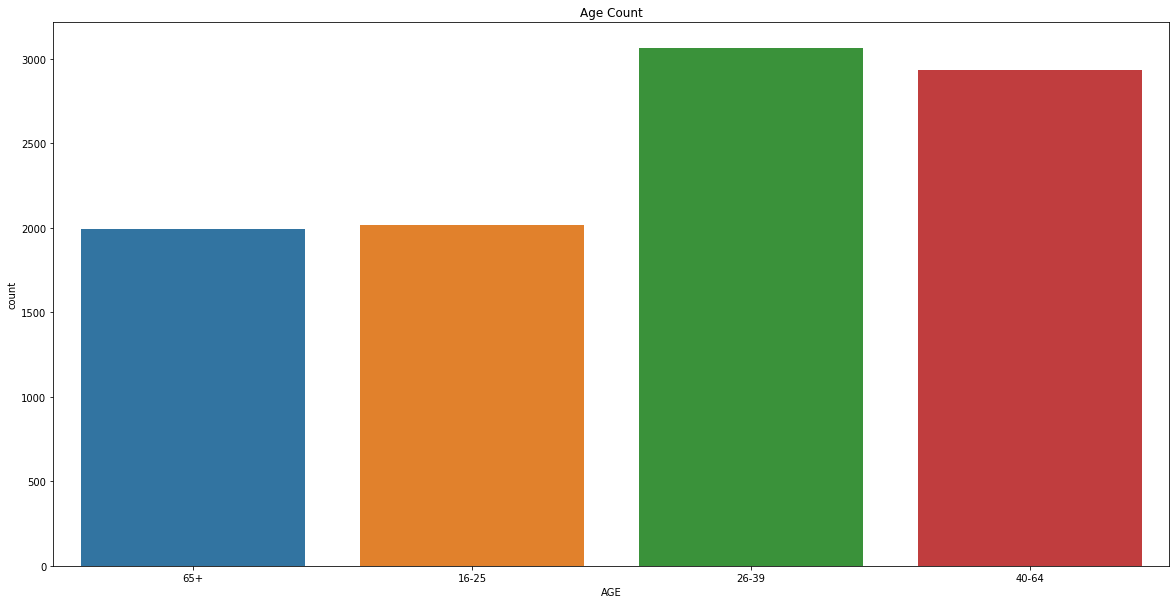

In [9]:
plt.figure(figsize=(20,10))
plt.title('Age Count')
sns.countplot(data=df, x ='AGE');

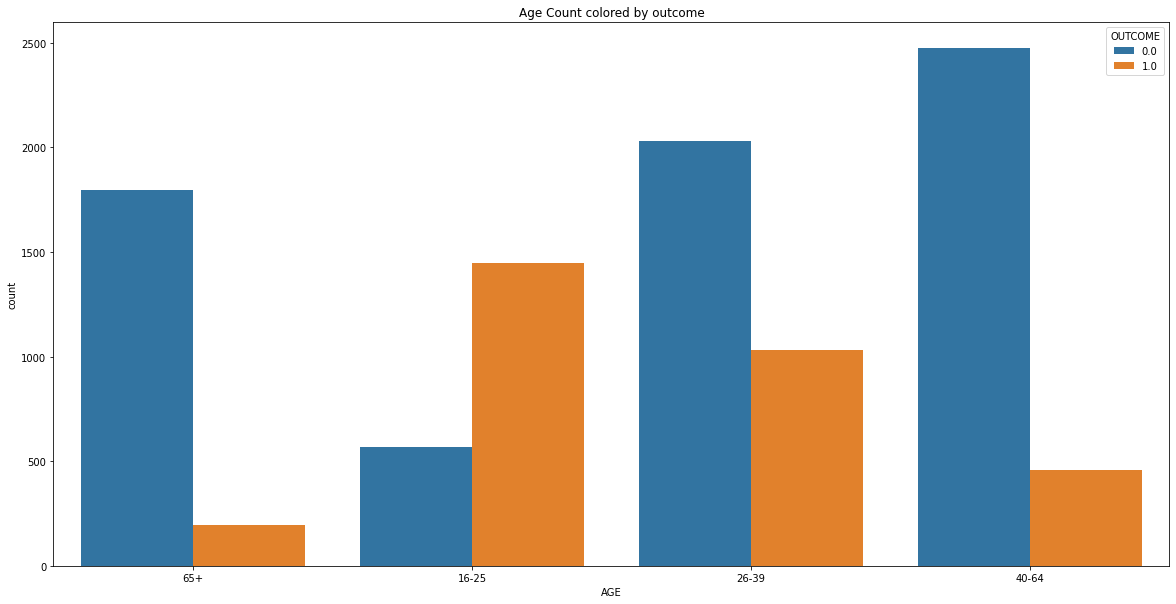

In [10]:
plt.figure(figsize=(20,10))
plt.title('Age Count colored by outcome')
sns.countplot(data=df, x ='AGE', hue='OUTCOME');

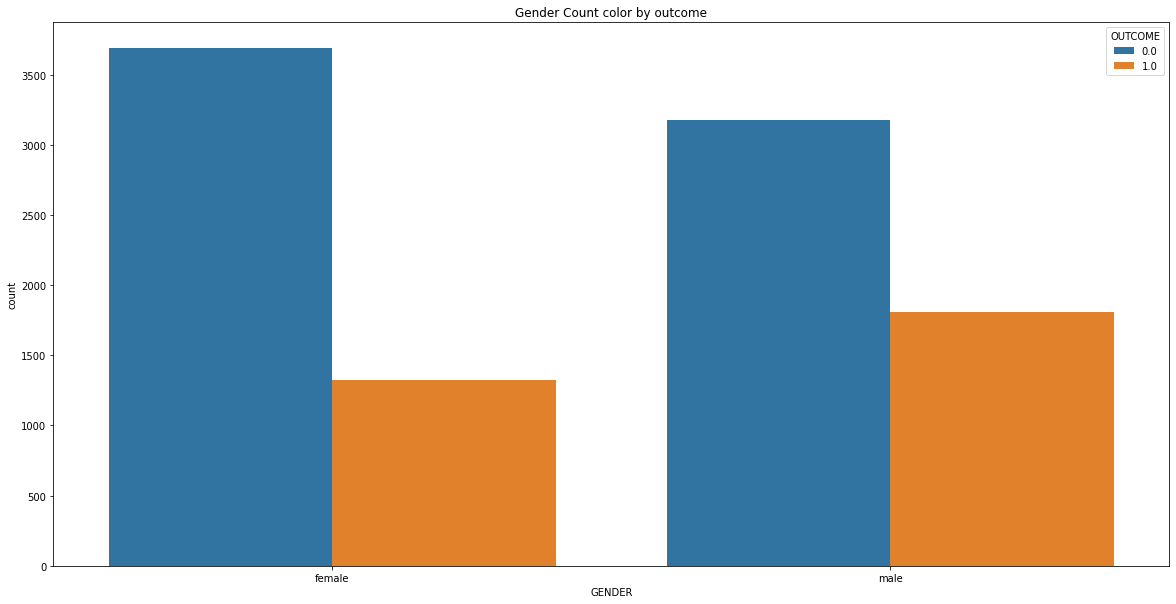

In [11]:
plt.figure(figsize=(20,10))
plt.title('Gender Count color by outcome')
sns.countplot(data=df, x ='GENDER', hue='OUTCOME');

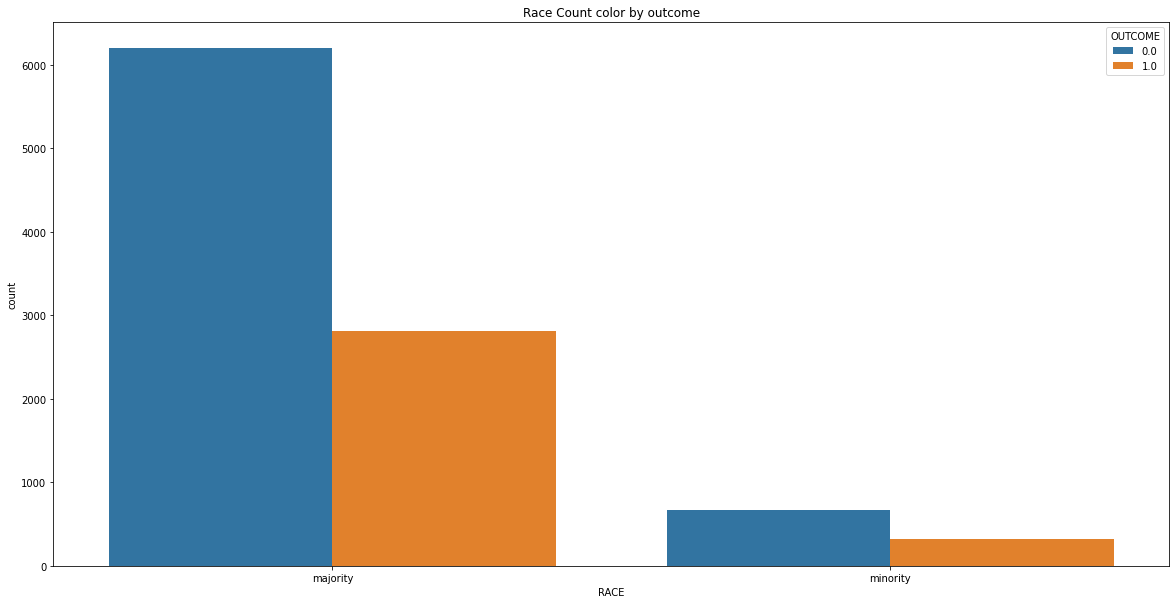

In [12]:
plt.figure(figsize=(20,10))
plt.title('Race Count color by outcome')
sns.countplot(data=df, x ='RACE', hue='OUTCOME');

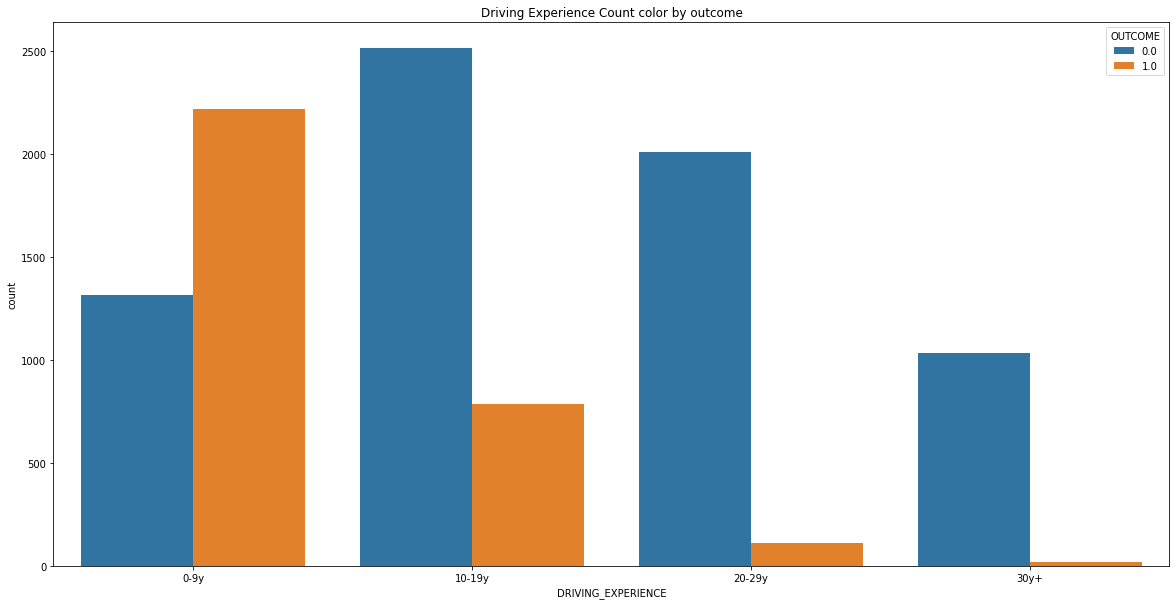

In [13]:
plt.figure(figsize=(20,10))
plt.title('Driving Experience Count color by outcome')
sns.countplot(data=df, x ='DRIVING_EXPERIENCE', hue='OUTCOME');

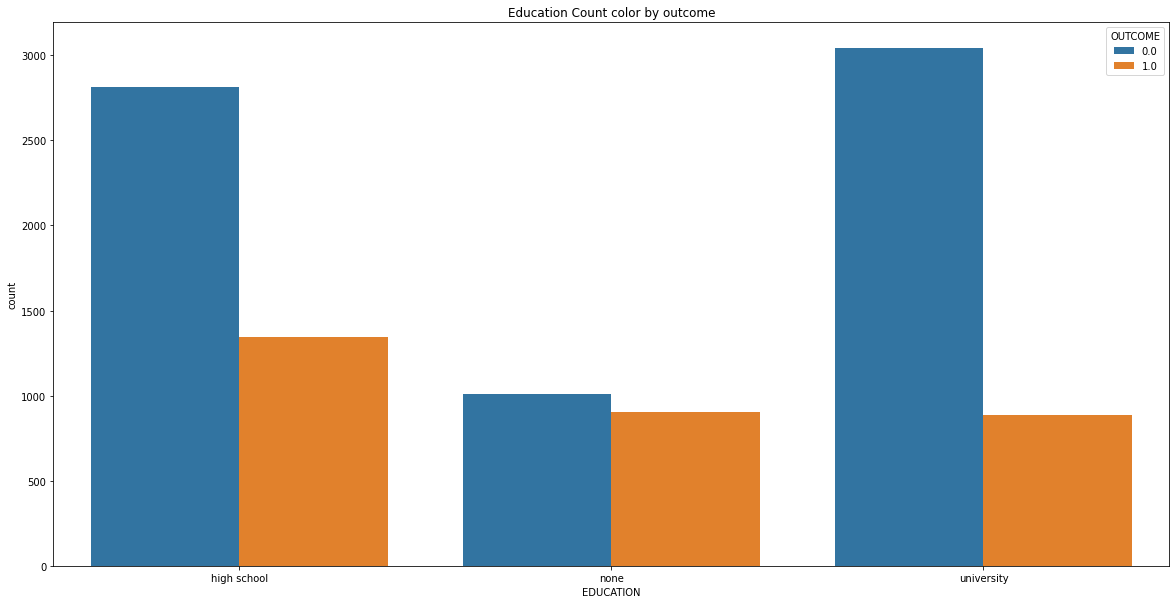

In [14]:
plt.figure(figsize=(20,10))
plt.title('Education Count color by outcome')
sns.countplot(data=df, x ='EDUCATION', hue='OUTCOME');

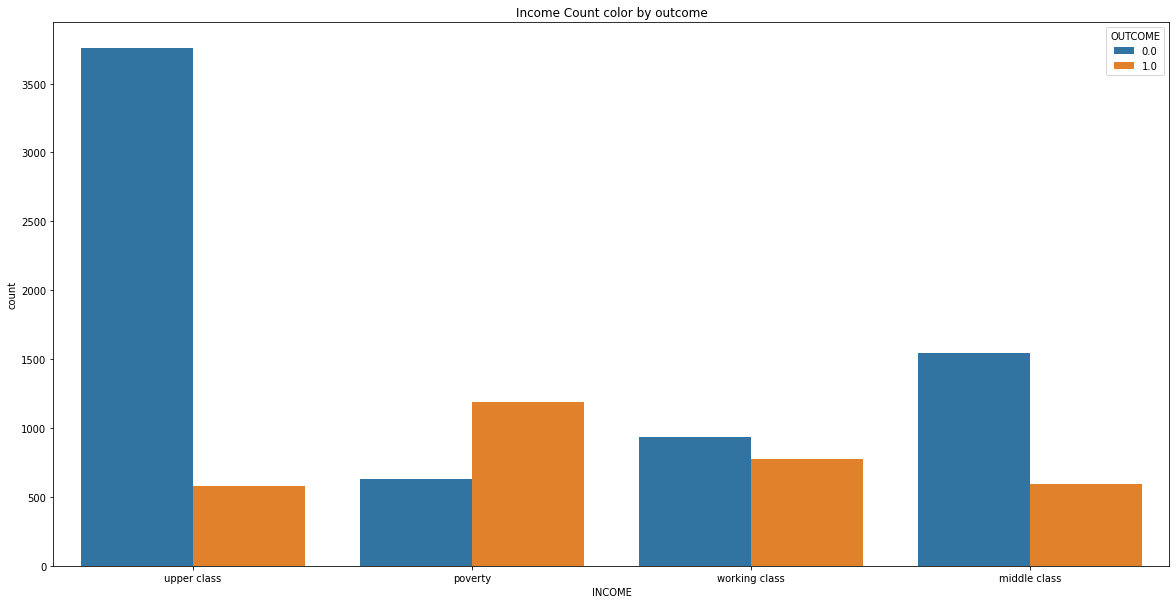

In [15]:
plt.figure(figsize=(20,10))
plt.title('Income Count color by outcome')
sns.countplot(data=df, x ='INCOME', hue='OUTCOME');

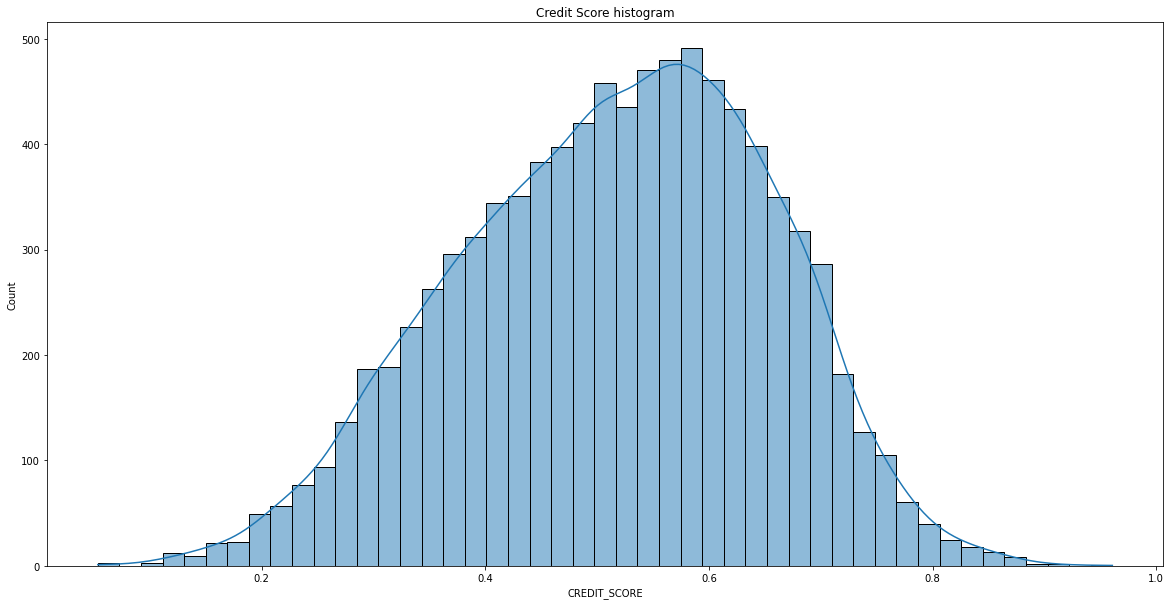

In [16]:
plt.figure(figsize=(20,10))
plt.title('Credit Score histogram')
sns.histplot(data=df, x='CREDIT_SCORE', kde=True);

<AxesSubplot:title={'center':'Boxplot of Credit Score'}, xlabel='CREDIT_SCORE'>

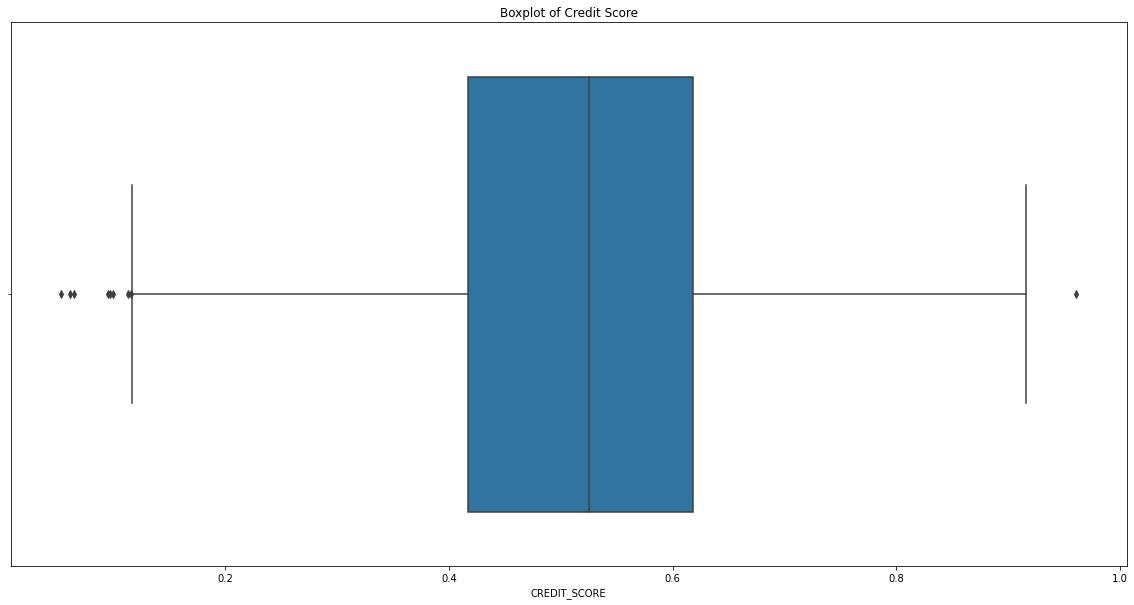

In [17]:
plt.figure(figsize=(20,10))
plt.title('Boxplot of Credit Score')
sns.boxplot(data=df, x='CREDIT_SCORE')

In [18]:
df[df['CREDIT_SCORE']<0.1]

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
2152,255200,16-25,female,majority,0-9y,none,poverty,0.053358,0.0,before 2015,0.0,1.0,10238,11000.0,sedan,0,0,0,1.0
4955,237974,16-25,male,majority,0-9y,none,poverty,0.064810,1.0,before 2015,0.0,1.0,10238,11000.0,sedan,0,0,0,0.0
6031,963384,16-25,male,majority,0-9y,high school,poverty,0.060867,1.0,before 2015,0.0,0.0,10238,12000.0,sedan,0,0,0,1.0
6752,834276,26-39,female,majority,10-19y,high school,poverty,0.099655,1.0,after 2015,0.0,0.0,10238,13000.0,sedan,1,0,1,0.0
8039,214281,26-39,male,majority,10-19y,none,poverty,0.095387,1.0,before 2015,0.0,0.0,10238,15000.0,sedan,2,1,2,1.0
8194,236191,16-25,male,majority,0-9y,none,poverty,0.097211,0.0,before 2015,0.0,0.0,10238,17000.0,sedan,0,0,0,1.0


In [19]:
df[df['CREDIT_SCORE']>0.9]

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
4552,224416,26-39,female,majority,10-19y,high school,upper class,0.915883,1.0,after 2015,0.0,0.0,32765,8000.0,sedan,1,0,0,0.0
7816,618914,65+,female,majority,10-19y,university,upper class,0.914117,1.0,before 2015,1.0,1.0,10238,7000.0,sedan,0,0,0,0.0
8057,825288,40-64,male,majority,10-19y,university,upper class,0.960819,1.0,after 2015,0.0,1.0,10238,10000.0,sedan,1,0,1,0.0


As we can see there are some outlier in the credit scores, however we dont think i will effect the overall model

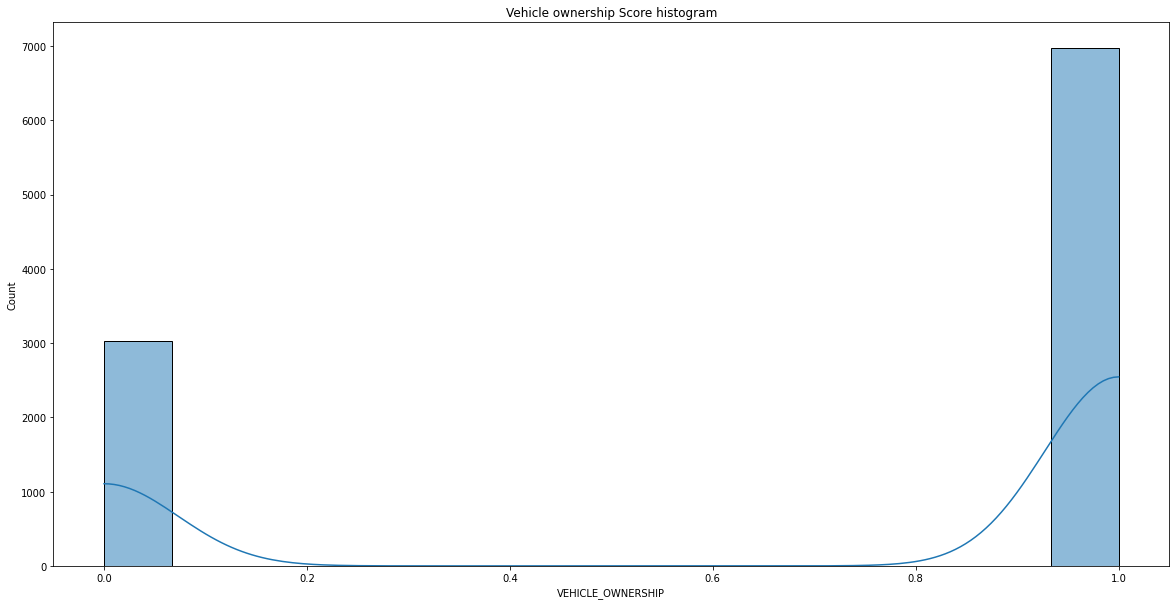

In [20]:
plt.figure(figsize=(20,10))
plt.title('Vehicle ownership Score histogram')
sns.histplot(data=df, x='VEHICLE_OWNERSHIP', kde=True);

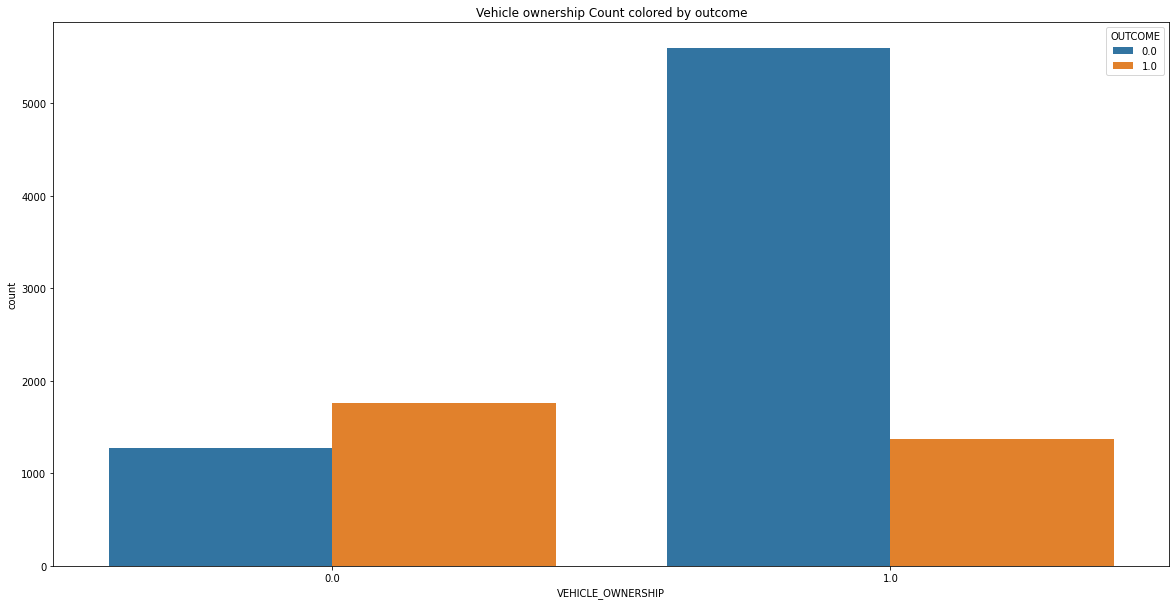

In [21]:
plt.figure(figsize=(20,10))
plt.title('Vehicle ownership Count colored by outcome')
sns.countplot(data=df, x='VEHICLE_OWNERSHIP', hue='OUTCOME');

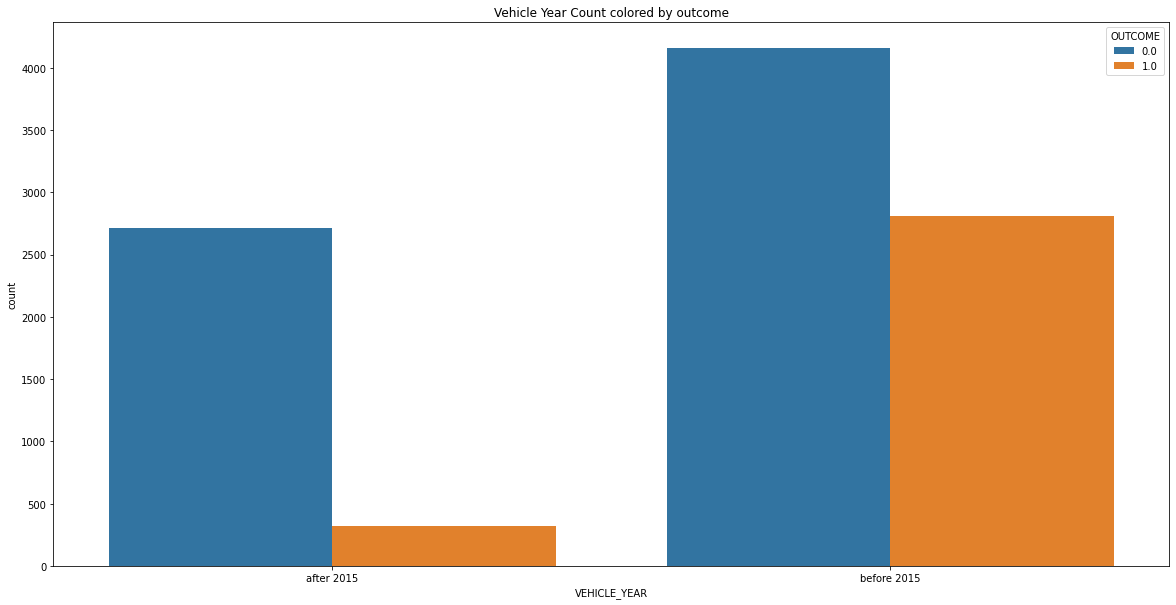

In [22]:
plt.figure(figsize=(20,10))
plt.title('Vehicle Year Count colored by outcome')
sns.countplot(data=df, x='VEHICLE_YEAR', hue='OUTCOME');

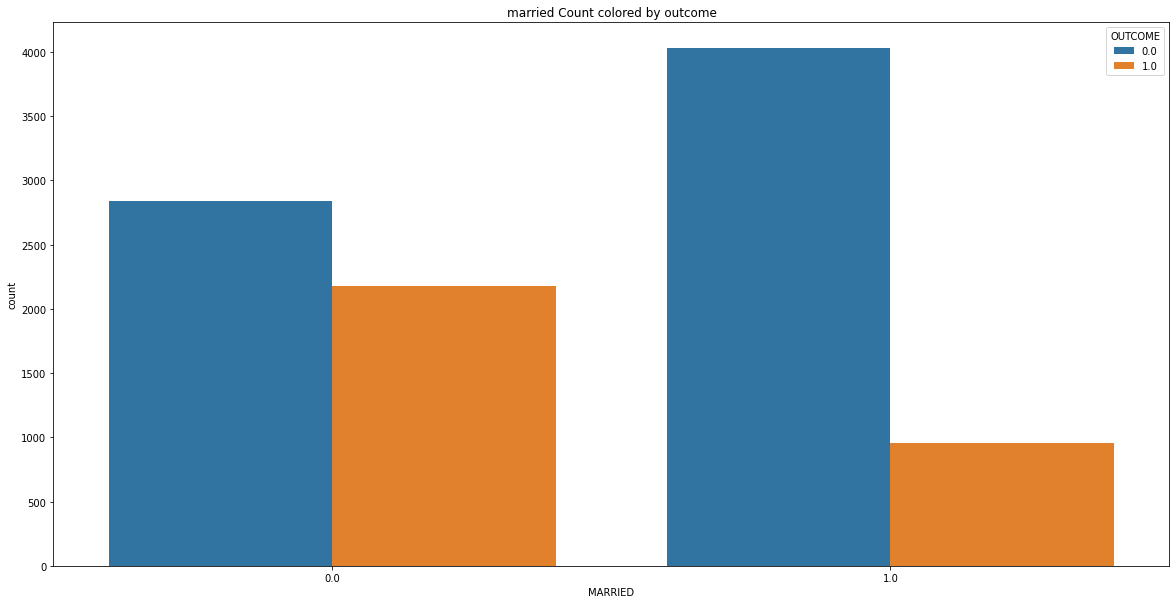

In [23]:
plt.figure(figsize=(20,10))
plt.title('married Count colored by outcome')
sns.countplot(data=df, x='MARRIED', hue='OUTCOME');

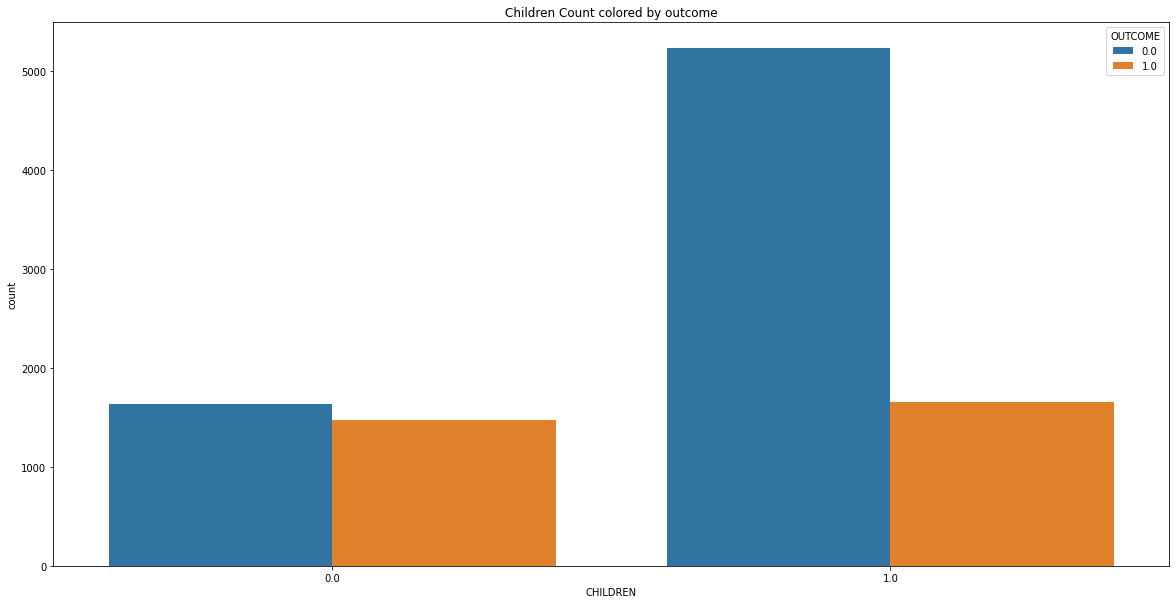

In [24]:
plt.figure(figsize=(20,10))
plt.title('Children Count colored by outcome')
sns.countplot(data=df, x='CHILDREN', hue='OUTCOME');

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

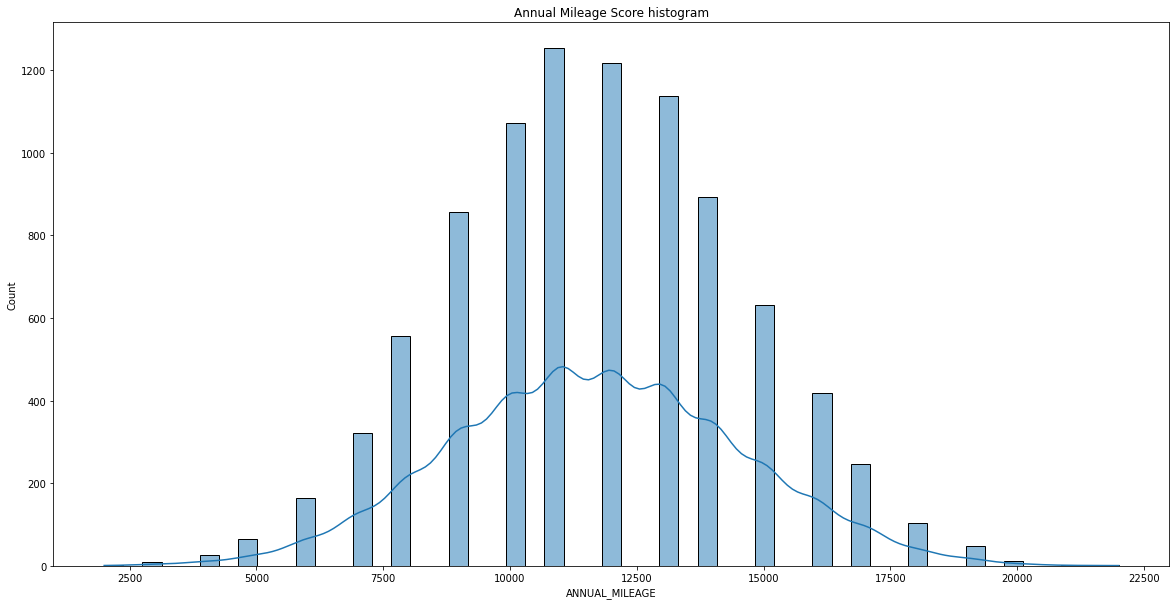

In [26]:
plt.figure(figsize=(20,10))
plt.title('Annual Mileage Score histogram')
sns.histplot(data=df, x='ANNUAL_MILEAGE', kde=True);

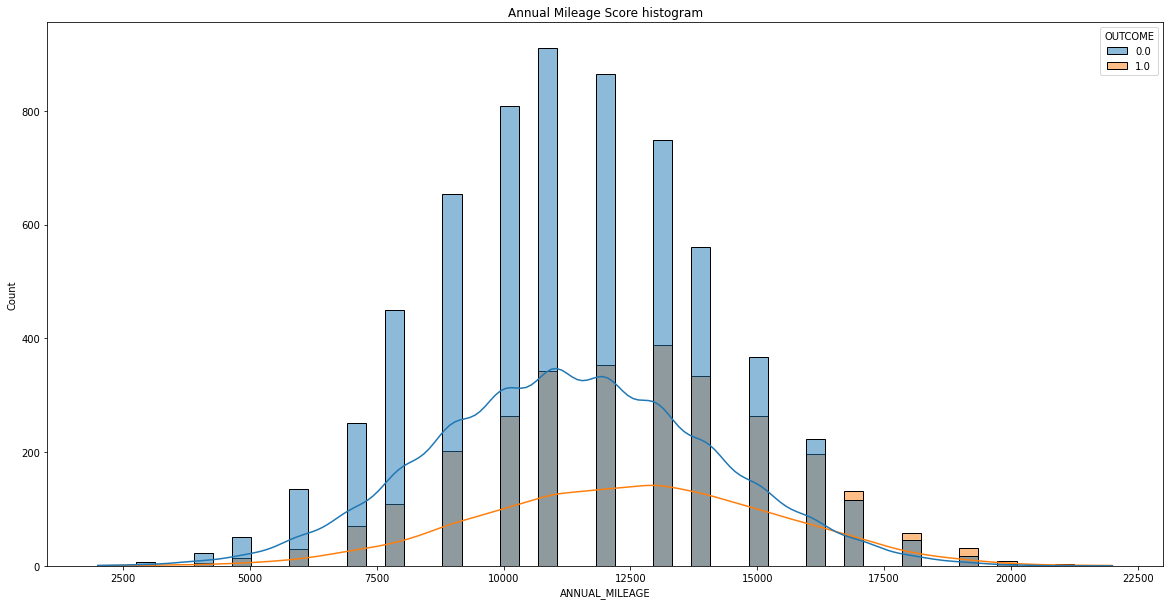

In [27]:
plt.figure(figsize=(20,10))
plt.title('Annual Mileage Score histogram')
sns.histplot(data=df, x='ANNUAL_MILEAGE',hue='OUTCOME', kde=True);

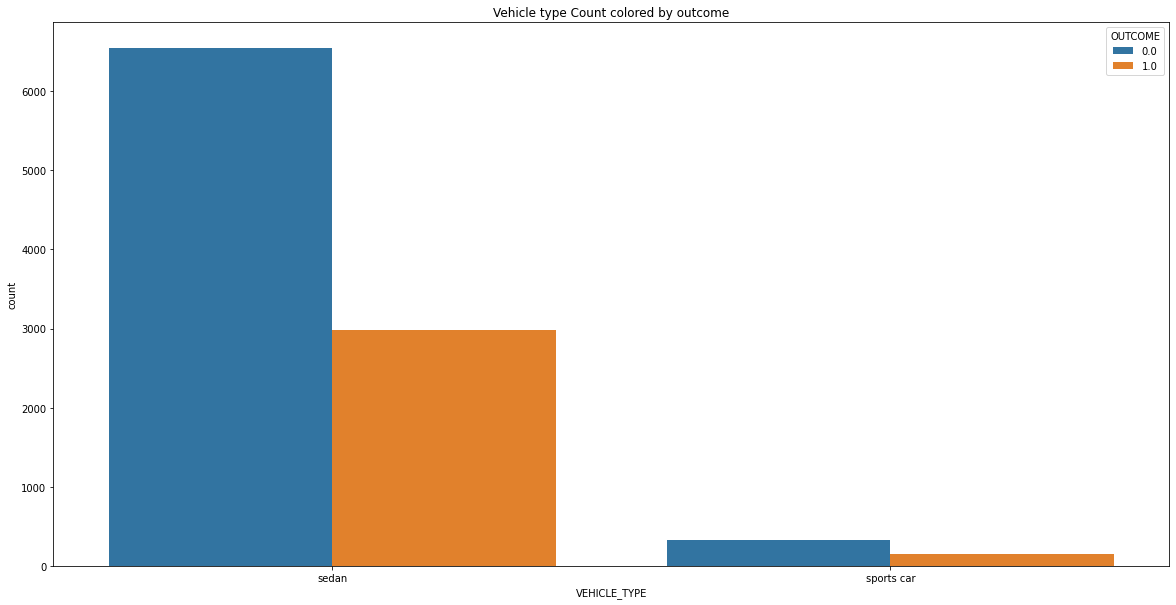

In [28]:
plt.figure(figsize=(20,10))
plt.title('Vehicle type Count colored by outcome')
sns.countplot(data=df, x='VEHICLE_TYPE', hue='OUTCOME');

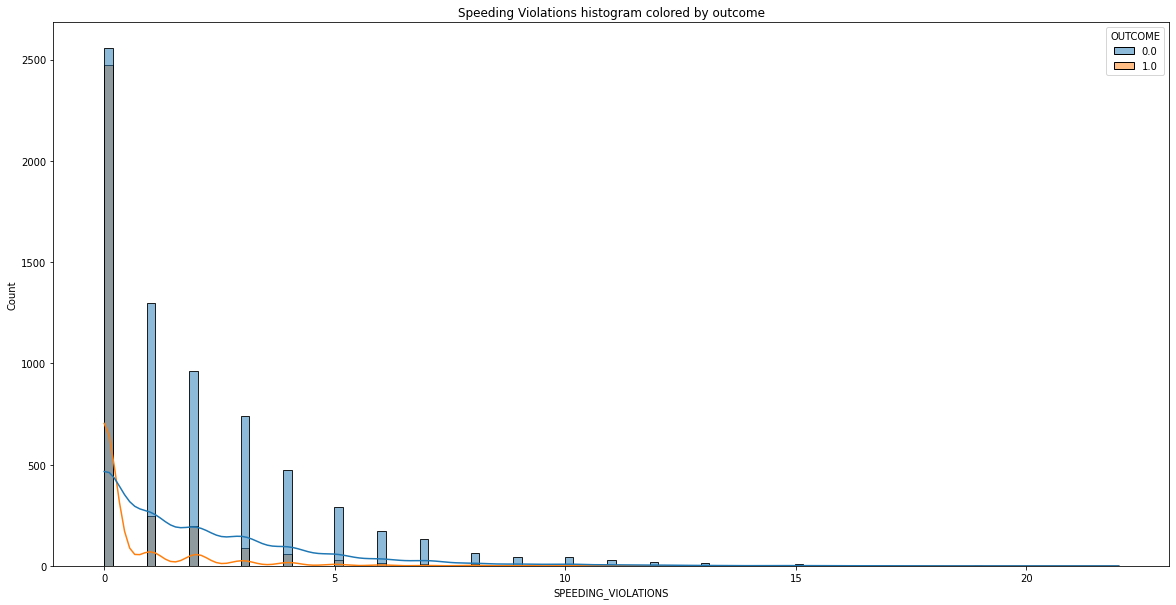

In [29]:
plt.figure(figsize=(20,10))
plt.title('Speeding Violations histogram colored by outcome')
sns.histplot(data=df, x='SPEEDING_VIOLATIONS',hue='OUTCOME', kde=True);

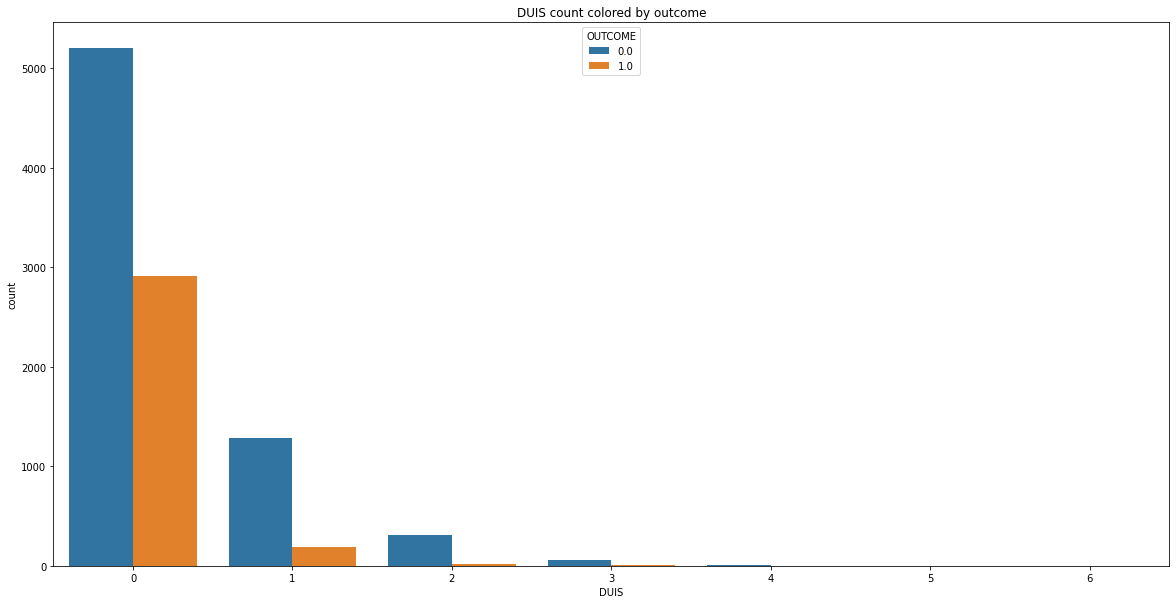

In [30]:
plt.figure(figsize=(20,10))
plt.title('DUIS count colored by outcome')
sns.countplot(data=df, x='DUIS',hue='OUTCOME');

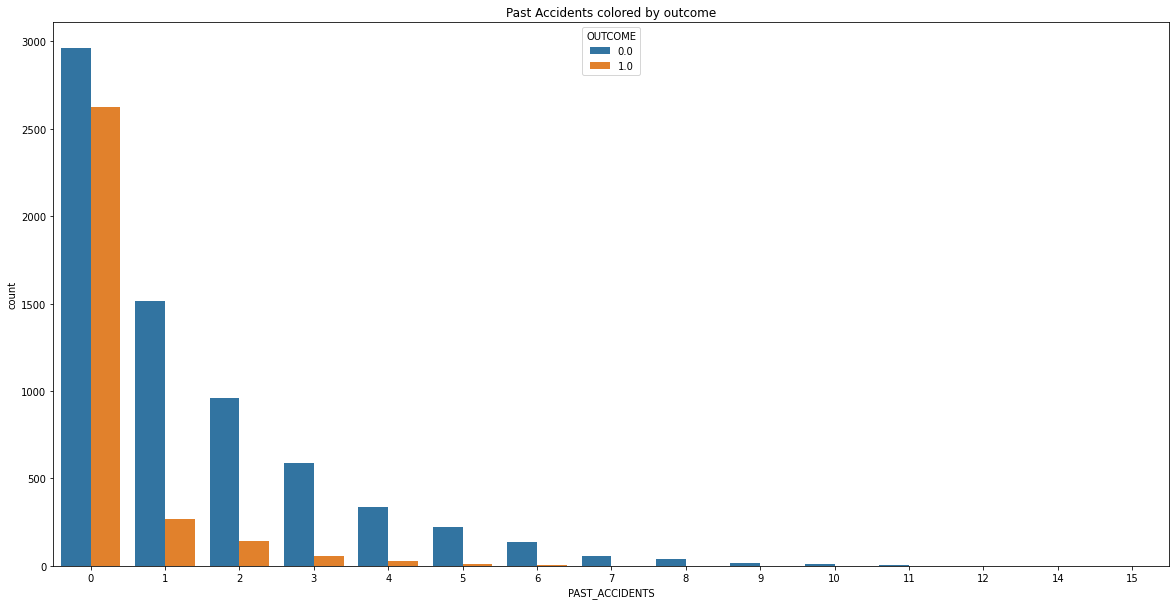

In [31]:
plt.figure(figsize=(20,10))
plt.title('Past Accidents colored by outcome')
sns.countplot(data=df, x='PAST_ACCIDENTS',hue='OUTCOME');

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

we will use the income group to fill the nan for the credit scores

In [33]:
df['INCOME'].value_counts()

upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: INCOME, dtype: int64

In [34]:
upper_class_median = df[df['INCOME'] == 'upper class']['CREDIT_SCORE'].median()
middle_class_median = df[df['INCOME'] == 'middle class']['CREDIT_SCORE'].median()
poverty_class_median = df[df['INCOME'] == 'poverty']['CREDIT_SCORE'].median()
working_class_median = df[df['INCOME'] == 'working class']['CREDIT_SCORE'].median()

In [35]:
df[(df['INCOME'] == 'working class') & df['CREDIT_SCORE'].isnull()].index

Int64Index([  72,   73,  136,  145,  241,  265,  380,  402,  410,  497,
            ...
            9676, 9722, 9762, 9785, 9832, 9870, 9881, 9901, 9981, 9985],
           dtype='int64', length=190)

In [36]:
df.loc[(df[(df['INCOME'] == 'working class') & df['CREDIT_SCORE'].isnull()].index),'CREDIT_SCORE'] = df[df['INCOME'] == 'working class']['CREDIT_SCORE'].fillna(working_class_median)
df.loc[(df[(df['INCOME'] == 'poverty') & df['CREDIT_SCORE'].isnull()].index),'CREDIT_SCORE'] = df[df['INCOME'] == 'poverty']['CREDIT_SCORE'].fillna(poverty_class_median)
df.loc[(df[(df['INCOME'] == 'middle class') & df['CREDIT_SCORE'].isnull()].index),'CREDIT_SCORE'] = df[df['INCOME'] == 'middle class']['CREDIT_SCORE'].fillna(middle_class_median)
df.loc[(df[(df['INCOME'] == 'upper class') & df['CREDIT_SCORE'].isnull()].index),'CREDIT_SCORE'] = df[df['INCOME'] == 'upper class']['CREDIT_SCORE'].fillna(upper_class_median)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         10000 non-null  float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

we will use the median ANNUAL_MILEAGE to fill the the nan values for ANNUAL_MILEAGE

In [38]:
df['ANNUAL_MILEAGE'] = df['ANNUAL_MILEAGE'].fillna(df['ANNUAL_MILEAGE'].median())

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         10000 non-null  float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       10000 non-null  float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [40]:
df.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515429,0.697000,0.498200,0.688800,19864.548400,11726.000000,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.134677,0.459578,0.500022,0.463008,18915.613855,2681.649329,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.421301,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.526747,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.616289,1.000000,1.000000,1.000000,32765.000000,13000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


# 5. Modelling

In [41]:
X = df.drop(['OUTCOME','ID'], axis=1)
y = df['OUTCOME']
X = pd.get_dummies(X, drop_first=True)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model imports

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [46]:
from warnings import filterwarnings
filterwarnings('ignore')

## Baseline Model Scores

In [47]:
from sklearn.metrics import classification_report,precision_score, recall_score,f1_score

In [48]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    model_scores = {}
    model_recall = {}
    model_f1 = {}
    model_precision = {}
    
    for name, model in models.items():
        model.fit(X_train,y_train)
        y_preds = model.predict(X_test)
        print(name)
        print(classification_report(y_test, y_preds))
        print('\n')
        model_scores[name] = model.score(X_test,y_test)
        model_recall[name] = recall_score(y_test, y_preds)
        model_f1[name] = f1_score(y_test, y_preds)
        model_precision[name] = precision_score(y_test, y_preds)

    model_scores = pd.DataFrame(model_scores, index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score')
    model_recall = pd.DataFrame(model_recall, index=['Recall']).transpose()
    model_recall = model_recall.sort_values('Recall')
    model_f1 = pd.DataFrame(model_f1, index=['F1']).transpose()
    model_f1 = model_f1.sort_values('F1')
    model_precision = pd.DataFrame(model_precision, index=['Precision']).transpose()
    model_precision = model_precision.sort_values('Precision')
        
    return model_scores, model_recall, model_f1, model_precision

In [49]:
models = {'LogisticRegression': LogisticRegression(max_iter=10000),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'SVC': SVC(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'AdaBoostClassifier': AdaBoostClassifier(),
          'GradientBoostingClassifier': GradientBoostingClassifier(),
          'XGBClassifier': XGBClassifier(objective='binary:logistic',eval_metric=['logloss']),
          'XGBRFClassifier': XGBRFClassifier(objective='binary:logistic',eval_metric=['logloss']),
          'LGBMClassifier':LGBMClassifier(),
         'CatBoostClassifier': CatBoostClassifier(verbose=0)}

In [50]:
model_scores, model_recall, model_f1, model_precision = fit_and_score(models, X_train, X_test, y_train, y_test)

LogisticRegression
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      2063
         1.0       0.76      0.72      0.74       937

    accuracy                           0.84      3000
   macro avg       0.82      0.81      0.82      3000
weighted avg       0.84      0.84      0.84      3000



KNeighborsClassifier
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86      2063
         1.0       0.71      0.66      0.68       937

    accuracy                           0.81      3000
   macro avg       0.78      0.77      0.77      3000
weighted avg       0.81      0.81      0.81      3000



SVC
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89      2063
         1.0       0.77      0.74      0.76       937

    accuracy                           0.85      3000
   macro avg       0.83      0.82      0.82      3000
weighted avg       0.85   

In [51]:
model_scores

,Score
DecisionTreeClassifier,0.800000
KNeighborsClassifier,0.808667
RandomForestClassifier,0.835333
AdaBoostClassifier,0.838667
LogisticRegression,0.844000
XGBClassifier,0.844667
XGBRFClassifier,0.844667
SVC,0.850000
GradientBoostingClassifier,0.851333
LGBMClassifier,0.852667


In [52]:
model_recall

,Recall
KNeighborsClassifier,0.658485
DecisionTreeClassifier,0.668090
AdaBoostClassifier,0.674493
RandomForestClassifier,0.684098
XGBRFClassifier,0.692636
LogisticRegression,0.724653
GradientBoostingClassifier,0.736393
XGBClassifier,0.737460
SVC,0.744931
CatBoostClassifier,0.750267


In [53]:
model_f1

,F1
DecisionTreeClassifier,0.676026
KNeighborsClassifier,0.682522
RandomForestClassifier,0.721847
AdaBoostClassifier,0.723112
XGBRFClassifier,0.735828
LogisticRegression,0.743702
XGBClassifier,0.747835
GradientBoostingClassifier,0.755750
SVC,0.756230
LGBMClassifier,0.763383


In [54]:
model_precision

,Precision
DecisionTreeClassifier,0.684153
KNeighborsClassifier,0.708381
XGBClassifier,0.758507
LogisticRegression,0.763780
RandomForestClassifier,0.764005
LGBMClassifier,0.765843
SVC,0.767877
GradientBoostingClassifier,0.776153
CatBoostClassifier,0.777655
AdaBoostClassifier,0.779285


Since the labels are in-balanced, We will choose to use the LGBMClassifier as it provides the best overall scores. we will do a Randome Search CV to find the optimized hyper parameters

## Random Search CV

In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [56]:
def randomsearch_cv_scores(models, params, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    model_rs_scores = {}
    model_rs_best_param = {}
    
    for name, model in models.items():
        rs_model = RandomizedSearchCV(model,
                                     param_distributions=params[name],
                                      scoring='f1',
                                      cv=5,
                                     n_iter=40,
                                     verbose=0)        
        rs_model.fit(X_train,y_train)
        model_rs_scores[name] = rs_model.score(X_test,y_test)
        model_rs_best_param[name] = rs_model.best_params_
        y_preds = rs_model.predict(X_test)
        print('\n')
        print(name)
        print(classification_report(y_test, y_preds))
        print('\n')
        
        
    return model_rs_scores, model_rs_best_param

## Baseline CV scores

In [57]:
models = {'LGBMClassifier': LGBMClassifier()}

params = {'LGBMClassifier':{}}

In [58]:
model_rs_scores_base, model_rs_best_param_base = randomsearch_cv_scores(models, params, X_train, X_test, y_train, y_test)



LGBMClassifier
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      2063
         1.0       0.77      0.76      0.76       937

    accuracy                           0.85      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.85      0.85      0.85      3000





## RS Model 1

In [59]:
params = {'LGBMClassifier':{'num_leaves': np.arange(21,42,2),
                           'learning_rate': np.linspace(0.1,0.9,9),
                            'n_estimators':[50,100,200,300,500],
                            'min_split_gain':np.linspace(0.0,0.9,10),
                            'min_child_weight':np.linspace(0.0,0.9,10),
                            'min_child_samples': [10,20,40,80,100],
                            'reg_alpha': np.linspace(0.0,0.9,10),
                            'reg_lambda': np.linspace(0.0,0.9,10)
                           }
         }

In [60]:
model_rs_scores1, model_rs_best_param1 = randomsearch_cv_scores(models, params, X_train, X_test, y_train, y_test)



LGBMClassifier
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89      2063
         1.0       0.77      0.76      0.76       937

    accuracy                           0.85      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.85      0.85      0.85      3000





In [61]:
model_rs_scores1

{'LGBMClassifier': 0.7648634172469201}

In [62]:
model_rs_best_param1

{'LGBMClassifier': {'reg_lambda': 0.5,
  'reg_alpha': 0.5,
  'num_leaves': 41,
  'n_estimators': 300,
  'min_split_gain': 0.8,
  'min_child_weight': 0.1,
  'min_child_samples': 10,
  'learning_rate': 0.1}}

## RS Model 2

In [63]:
params = {'LGBMClassifier':{'num_leaves': np.arange(30,43),
                           'learning_rate': np.linspace(0.0,0.2,9),
                            'n_estimators':[250,300,250],
                            'min_split_gain':np.linspace(0.7,0.9,10),
                            'min_child_weight':np.linspace(0.0,0.1,10),
                            'min_child_samples': [5,10,20,30],
                            'reg_alpha': np.linspace(0.4,0.6,10),
                            'reg_lambda': np.linspace(0.4,1.6,10)
                           }
         }

In [64]:
model_rs_scores2, model_rs_best_param2 = randomsearch_cv_scores(models, params, X_train, X_test, y_train, y_test)



LGBMClassifier
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90      2063
         1.0       0.77      0.76      0.77       937

    accuracy                           0.86      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.86      0.86      0.86      3000





In [65]:
model_rs_scores2

{'LGBMClassifier': 0.7677419354838709}

In [66]:
model_rs_best_param2

{'LGBMClassifier': {'reg_lambda': 1.6,
  'reg_alpha': 0.5333333333333333,
  'num_leaves': 41,
  'n_estimators': 300,
  'min_split_gain': 0.8555555555555556,
  'min_child_weight': 0.05555555555555556,
  'min_child_samples': 5,
  'learning_rate': 0.05}}

## RS Model 3

In [67]:
params = {'LGBMClassifier':{'num_leaves': [41],
                           'learning_rate': np.linspace(0.001,0.006,9),
                            'n_estimators':[290,300,310],
                            'min_split_gain':np.linspace(0.8,0.9,10),
                            'min_child_weight':[0.05555555555555556],
                            'min_child_samples': [3,4,5,6,7,8],
                            'reg_alpha': [0.5333333333333333],
                            'reg_lambda': [1.6]
                           }
         }

In [ ]:
model_rs_scores3, model_rs_best_param3 = randomsearch_cv_scores(models, params, X_train, X_test, y_train, y_test)

In [ ]:
model_rs_scores3

In [ ]:
model_rs_best_param3

In [ ]:
model_rs_scores2

In [ ]:
model_rs_best_param2

We will use RS model 2 as that provides the best hyperparameters

# 6. Model Evalution

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix,plot_roc_curve
from sklearn.model_selection import cross_val_score

In [ ]:
model = LGBMClassifier(reg_lambda = 1.6,
                      reg_alpha = 0.5333333333333333,
                      num_leaves = 41,
                      n_estimators = 300,
                      min_split_gain = 0.8555555555555556,
                      min_child_weight = 0.05555555555555556,
                      min_child_samples = 5,
                      learning_rate = 0.05)

In [ ]:
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

## Classification Report

In [ ]:
print(classification_report(y_test, y_preds))

## Confusion Matirx

In [ ]:
plot_confusion_matrix(model, X_test,y_test)

## ROC Curve

In [ ]:
plot_roc_curve(model, X_test,y_test)

## Evalution using Cross-Validation

In [ ]:
def get_cv_score(model, X, y, cv=5):
    
    
    cv_accuracy = cross_val_score(model,X,y,cv=cv,
                         scoring='accuracy')
    print(f'Cross Validaion accuracy Scores: {cv_accuracy}')
    print(f'Cross Validation accuracy Mean Score: {cv_accuracy.mean()}')
    
    cv_precision = cross_val_score(model,X,y,cv=cv,
                         scoring='precision')
    print(f'Cross Validaion precision Scores: {cv_precision}')
    print(f'Cross Validation precision Mean Score: {cv_precision.mean()}')
    
    cv_recall = cross_val_score(model,X,y,cv=cv,
                         scoring='recall')
    print(f'Cross Validaion recall Scores: {cv_recall}')
    print(f'Cross Validation recall Mean Score: {cv_recall.mean()}')
    
    cv_f1 = cross_val_score(model,X,y,cv=cv,
                         scoring='f1')
    print(f'Cross Validaion f1 Scores: {cv_f1}')
    print(f'Cross Validation f1 Mean Score: {cv_f1.mean()}')   
    
    cv_merics = pd.DataFrame({'Accuracy': cv_accuracy.mean(),
                         'Precision': cv_precision.mean(),
                         'Recall': cv_recall.mean(),
                         'f1': cv_recall.mean()},index=[0])
    
    return cv_merics

In [ ]:
cv_merics = get_cv_score(model, X_train, y_train, cv=5)

In [ ]:
cv_merics

with the model, and with the CV evalution, we are able to get the following:

    Accuracy 0.850714
    Precision 0.762139
    Recall 0.762747
    f1 0.762747

# 7. Experimentation / Improvements

with a scoring model of Recall 76% and f1 of 76% in the CV and classification, we hope to get a better scoring model.

maybe we can look into the follow for improvements:

    1. Check for other outliers? or other ways to fill nan values? or dropping the nan instead of filling them?
    2. Build and looking in to the dataset again to build a better model
    3. Getting more data to balance out the labels?